<a href="https://colab.research.google.com/github/yarkalm/math_stat_diabet/blob/main/Math_stat_diabetic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Первая стадия

In [490]:
!pip install scikit_posthocs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [491]:
import pandas as pd
import hashlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import lognorm
from scipy.stats import kruskal, normaltest
from scikit_posthocs import posthoc_dunn

In [492]:
s_1 = pd.read_excel('/content/Math_stat_diabet.xlsx',sheet_name='1 стадия')

/usr/local/lib/python3.9/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [493]:
s_1 = s_1.loc[:, ~s_1.columns.str.contains('^Unnamed')]

In [494]:
"""
names = df['ФИО'].to_list()
for i in range(len(names)):
  name = hashlib.sha1()
  name.update(names[i].encode('utf-8'))
  names[i] = name.hexdigest()

df['ФИО'] = names
"""

"\nnames = df['ФИО'].to_list()\nfor i in range(len(names)):\n  name = hashlib.sha1()\n  name.update(names[i].encode('utf-8'))\n  names[i] = name.hexdigest()\n\ndf['ФИО'] = names\n"

In [495]:
s_1 = s_1[list(s_1.columns)[1:]]

In [496]:
s_1.describe()

,возраст,ИМТ,вес (кг),стаж болезни,"Креатинин, мкмоль/л","СКФ по формуле MDRD, мл/мин",СКФ CKD-EPI,"Глюкоза, ммоль/л","Железо, мкмоль/л",СОЭ (мм/ч),...,"Ср. содержание HGB в RBC (MCH), пг","Тромбоциты (PLT), 10^9/л","Ширина распределения RBC (RDV-CV), %",лейкоциты,"Эозинофилы, %","Лимфоциты, %","Нейтрофилы, %","Моноциты, %","Базофилы, %",рост (см)
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000,...,25.000000,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,51.080000,29.743625,83.080000,11.40000,65.661200,102.192000,101.040000,13.154000,1.314800,12.12000,...,28.956000,259.040000,13.472000,6.998800,3.02800,32.592000,55.448000,8.204000,0.664000,166.680000
std,16.913801,8.605128,26.261378,5.88076,10.265014,11.391514,12.084701,6.232516,3.249287,7.44043,...,2.404697,78.926907,1.257816,1.303941,1.55845,11.672186,12.215397,1.664202,0.336502,8.740328
min,20.000000,15.731336,44.000000,5.00000,47.980000,80.000000,81.000000,4.360000,0.000000,2.00000,...,22.200000,83.000000,11.800000,4.500000,0.80000,8.500000,30.600000,5.000000,0.100000,142.000000
25%,40.000000,21.821067,63.000000,7.00000,57.500000,95.600000,94.000000,8.590000,0.000000,6.00000,...,28.000000,227.000000,12.800000,6.460000,1.70000,27.700000,48.300000,6.900000,0.400000,164.000000
50%,56.000000,29.387755,82.000000,10.00000,62.700000,101.900000,98.000000,11.660000,0.000000,11.00000,...,29.500000,263.000000,13.000000,6.940000,2.80000,32.200000,55.900000,8.200000,0.600000,168.000000
75%,64.000000,35.430839,100.000000,14.00000,71.960000,105.500000,102.000000,15.340000,0.000000,17.00000,...,30.300000,294.000000,14.300000,7.580000,3.90000,37.900000,59.100000,9.300000,0.800000,171.000000
max,70.000000,51.374717,145.000000,27.00000,86.650000,131.600000,128.000000,28.000000,12.580000,32.00000,...,32.200000,491.000000,17.100000,11.250000,7.10000,58.900000,82.300000,11.200000,1.700000,182.000000


<Axes: xlabel='СКФ CKD-EPI', ylabel='Frequency'>

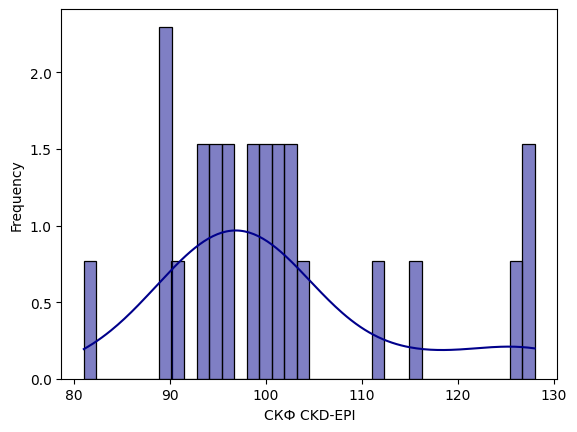

In [497]:
sns.histplot(s_1['СКФ CKD-EPI'], kde=True, bins=int(180/5), color = 'darkblue', stat = 'frequency')

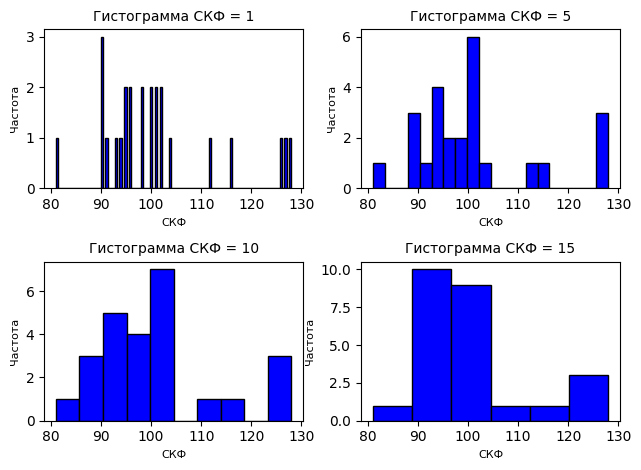

In [498]:
for i, binwidth in enumerate([1, 5, 10, 15]):

    # Set up the plot
    ax = plt.subplot(2, 2, i + 1)

    # Draw the plot
    ax.hist(s_1['СКФ CKD-EPI'], bins = int(100/binwidth),
             color = 'blue', edgecolor = 'black')

    # Title and labels
    ax.set_title('Гистограмма СКФ = %d' % binwidth, size = 10)
    ax.set_xlabel('СКФ', size = 8)
    ax.set_ylabel('Частота', size= 8)

plt.tight_layout()
plt.show()

In [499]:
alpha = 0.05
print(f"pvalue: {normaltest(s_1['СКФ CKD-EPI']).pvalue : .2f}")
if normaltest(s_1['СКФ CKD-EPI']).pvalue < alpha:
    print("Не нормальное")
else:
    print("Нормальное")

pvalue:  0.05
Не нормальное


Т.к. значение pvalue < 0.05, можно сделать вывод, что данные получены не из нормального распределения.
Графики позволяют сделать вывод о том же.

Найдём процентили и медианы для всех числовых значений

In [500]:
median = s_1.median().to_frame().T
median.index = ['median']
pd.concat([s_1.describe().loc[['25%','75%']],median])

<ipython-input-500-8e98b644d5db>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median = s_1.median().to_frame().T


,возраст,ИМТ,вес (кг),стаж болезни,"Креатинин, мкмоль/л","СКФ по формуле MDRD, мл/мин",СКФ CKD-EPI,"Глюкоза, ммоль/л","Железо, мкмоль/л",СОЭ (мм/ч),...,"Ср. содержание HGB в RBC (MCH), пг","Тромбоциты (PLT), 10^9/л","Ширина распределения RBC (RDV-CV), %",лейкоциты,"Эозинофилы, %","Лимфоциты, %","Нейтрофилы, %","Моноциты, %","Базофилы, %",рост (см)
25%,40.0,21.821067,63.0,7.0,57.50,95.6,94.0,8.59,0.0,6.0,...,28.0,227.0,12.8,6.46,1.7,27.7,48.3,6.9,0.4,164.0
75%,64.0,35.430839,100.0,14.0,71.96,105.5,102.0,15.34,0.0,17.0,...,30.3,294.0,14.3,7.58,3.9,37.9,59.1,9.3,0.8,171.0
median,56.0,29.387755,82.0,10.0,62.70,101.9,98.0,11.66,0.0,11.0,...,29.5,263.0,13.0,6.94,2.8,32.2,55.9,8.2,0.6,168.0


# Вторая стадия

In [501]:
s_2 = pd.read_excel('/content/Math_stat_diabet.xlsx',sheet_name='2 стадия')
s_2 = s_2.loc[:, ~s_2.columns.str.contains('^Unnamed')]
s_2 = s_2[list(s_2.columns)[1:]]

/usr/local/lib/python3.9/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


<Axes: xlabel='СКФ CKD-EPI', ylabel='Count'>

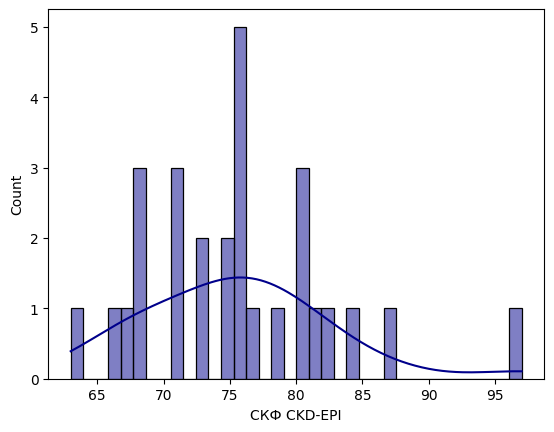

In [502]:
sns.histplot(s_2['СКФ CKD-EPI'], kde=True, bins=int(180/5), color = 'darkblue')

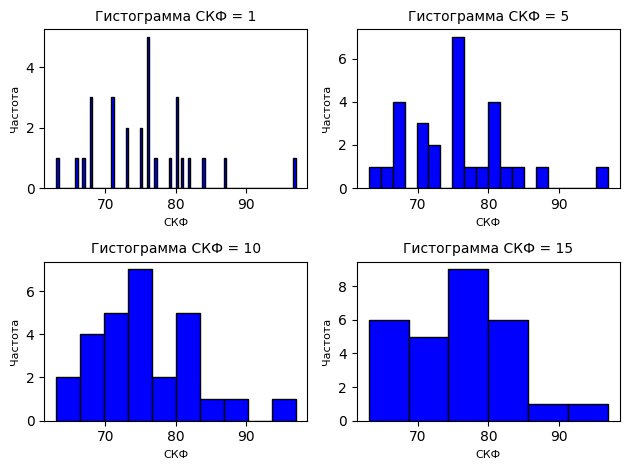

In [503]:
for i, binwidth in enumerate([1, 5, 10, 15]):

    # Set up the plot
    ax = plt.subplot(2, 2, i + 1)

    # Draw the plot
    ax.hist(s_2['СКФ CKD-EPI'], bins = int(100/binwidth),
             color = 'blue', edgecolor = 'black')

    # Title and labels
    ax.set_title('Гистограмма СКФ = %d' % binwidth, size = 10)
    ax.set_xlabel('СКФ', size = 8)
    ax.set_ylabel('Частота', size= 8)

plt.tight_layout()
plt.show()

In [504]:
alpha = 0.05
print(f"pvalue: {normaltest(s_2['СКФ CKD-EPI']).pvalue : .2f}")
if normaltest(s_2['СКФ CKD-EPI']).pvalue < alpha:
    print("Не нормальное")
else:
    print("Нормальное")

pvalue:  0.04
Не нормальное


Т.к. значение pvalue < 0.05, можно сделать вывод, что данные получены не из нормального распределения.
Графики позволяют сделать вывод о том же.

Найдём процентили и медианы для всех числовых значений

In [505]:
median = s_2.median().to_frame().T
median.index = ['median']
pd.concat([s_2.describe().loc[['25%','75%']],median])

<ipython-input-505-910f92494d39>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median = s_2.median().to_frame().T


,возраст,ИМТ,вес (кг),стаж болезни,"Креатинин, мкмоль/л","СКФ по формуле MDRD, мл/мин",СКФ CKD-EPI,"Глюкоза, ммоль/л","Железо, мкмоль/л",СОЭ (мм/ч),...,"Ср. объем эритроцитов (MCV), фл","Ср. содержание HGB в RBC (MCH), пг","Тромбоциты (PLT), 10^9/л","Ширина распределения RBC (RDV-CV), %",лейкоциты,"Эозинофилы, %","Лимфоциты, %","Нейтрофилы, %","Базофилы, %",рост (см)
25%,57.0,26.078972,74.0,9.0,72.42,69.2,71.0,7.81,0.0,6.0,...,84.1,27.3,233.0,12.7,5.22,1.7,29.8,51.6,0.4,160.0
75%,67.0,35.986159,103.0,16.0,86.43,80.6,80.0,15.90,0.0,25.0,...,90.5,30.1,311.0,13.5,8.41,3.6,37.5,56.9,0.6,172.0
median,64.0,30.078125,80.0,12.0,80.00,74.3,76.0,12.53,0.0,12.0,...,86.2,28.9,272.0,13.2,7.17,2.8,33.5,55.1,0.6,167.0


# Третья (а) стадия

In [506]:
s_3a = pd.read_excel('/content/Math_stat_diabet.xlsx',sheet_name='3а стадия')
s_3a = s_3a.loc[:, ~s_3a.columns.str.contains('^Unnamed')]
s_3a = s_3a[list(s_3a.columns)[1:]]

<Axes: xlabel='СКФ CKD-EPI', ylabel='Count'>

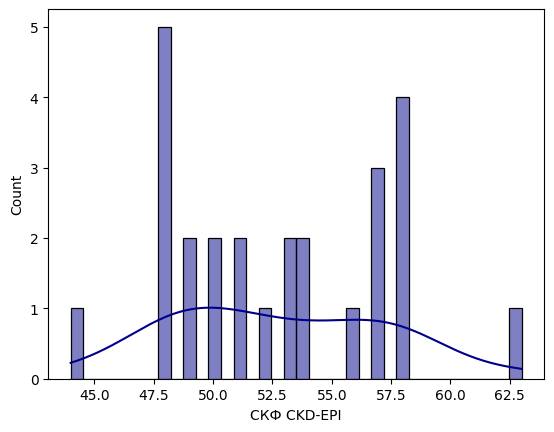

In [507]:
sns.histplot(s_3a['СКФ CKD-EPI'], kde=True, bins=int(180/5), color = 'darkblue')

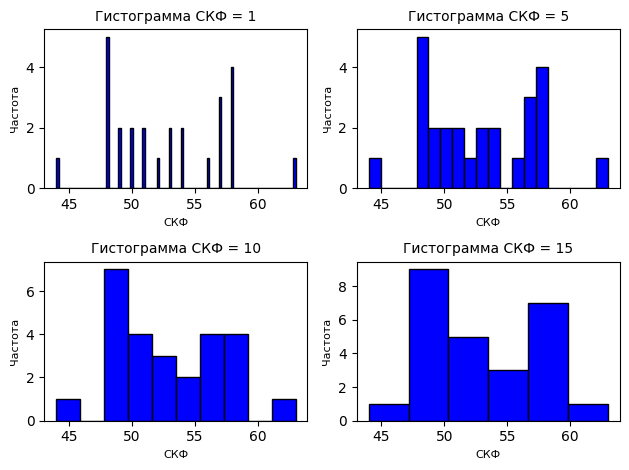

In [508]:
for i, binwidth in enumerate([1, 5, 10, 15]):

    # Set up the plot
    ax = plt.subplot(2, 2, i + 1)

    # Draw the plot
    ax.hist(s_3a['СКФ CKD-EPI'], bins = int(100/binwidth),
             color = 'blue', edgecolor = 'black')

    # Title and labels
    ax.set_title('Гистограмма СКФ = %d' % binwidth, size = 10)
    ax.set_xlabel('СКФ', size = 8)
    ax.set_ylabel('Частота', size= 8)

plt.tight_layout()
plt.show()

In [509]:
alpha = 0.05
print(f"pvalue: {normaltest(s_3a['СКФ CKD-EPI']).pvalue : .2f}")
if normaltest(s_3a['СКФ CKD-EPI']).pvalue > alpha:
    print('Нормальное')
else:
    print('Не нормальное')

pvalue:  0.69
Нормальное


In [510]:
s_3a.describe().loc[['mean','std']]

,возраст,ИМТ,вес (кг),стаж болезни,"Креатинин, мкмоль/л","СКФ по формуле MDRD, мл/мин",СКФ CKD-EPI,"Глюкоза, ммоль/л","Железо, мкмоль/л",СОЭ (мм/ч),...,"Ср. содержание HGB в RBC (MCH), пг","Тромбоциты (PLT), 10^9/л","Ширина распределения RBC (RDV-CV), %",лейкоциты,"Эозинофилы, %","Лимфоциты, %","Нейтрофилы, %","Моноциты, %","Базофилы, %",рост (см)
mean,69.115385,31.585937,85.038462,16.846154,102.521923,54.139231,52.769231,11.421538,0.976154,19.500000,...,28.369231,257.692308,13.861538,7.805000,2.765385,28.223077,60.030769,8.269231,0.580769,163.846154
std,9.831895,4.673245,16.207358,9.289531,15.343371,3.539313,4.572157,5.384206,2.375603,12.319903,...,3.143854,72.531797,1.968568,2.905845,2.209605,8.334953,10.261570,1.696295,0.344115,11.435707


# Третья (б) стадия

In [511]:
s_3b = pd.read_excel('/content/Math_stat_diabet.xlsx',sheet_name='3б стадия')
s_3b = s_3b.loc[:, ~s_3b.columns.str.contains('^Unnamed')]
s_3b = s_3b[list(s_3b.columns)[1:]]

/usr/local/lib/python3.9/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


<Axes: xlabel='СКФ CKD-EPI', ylabel='Count'>

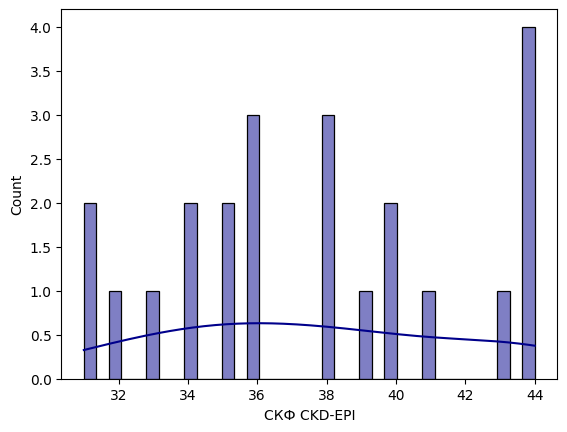

In [512]:
sns.histplot(s_3b['СКФ CKD-EPI'], kde=True, bins=int(180/5), color = 'darkblue')

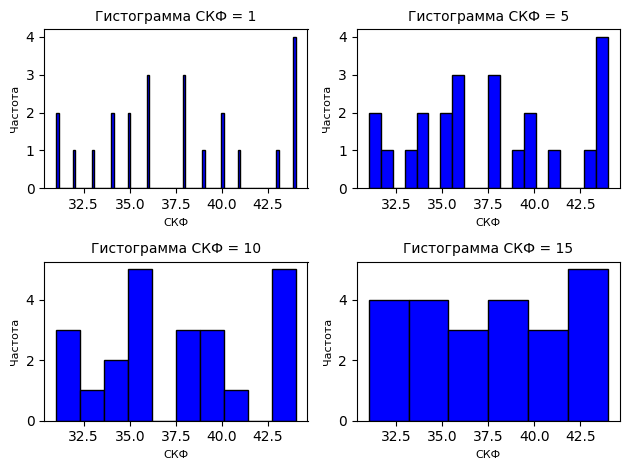

In [513]:
for i, binwidth in enumerate([1, 5, 10, 15]):

    # Set up the plot
    ax = plt.subplot(2, 2, i + 1)

    # Draw the plot
    ax.hist(s_3b['СКФ CKD-EPI'], bins = int(100/binwidth),
             color = 'blue', edgecolor = 'black')

    # Title and labels
    ax.set_title('Гистограмма СКФ = %d' % binwidth, size = 10)
    ax.set_xlabel('СКФ', size = 8)
    ax.set_ylabel('Частота', size= 8)

plt.tight_layout()
plt.show()

In [514]:
alpha = 0.05
print(f"pvalue: {normaltest(s_3b['СКФ CKD-EPI']).pvalue : .2f}")
if normaltest(s_3b['СКФ CKD-EPI']).pvalue > alpha:
    print('Нормальное')
else:
    print('Не нормальное')

pvalue:  0.25
Нормальное


In [515]:
s_3b.describe().loc[['mean','std']]

,возраст,ИМТ,вес (кг),стаж болезни,"Креатинин, мкмоль/л","СКФ по формуле MDRD, мл/мин",СКФ CKD-EPI,"Глюкоза, ммоль/л","Железо, мкмоль/л",СОЭ (мм/ч),...,"Ср. содержание HGB в RBC (MCH), пг","Тромбоциты (PLT), 10^9/л","Ширина распределения RBC (RDV-CV), %",лейкоциты,"Эозинофилы, %","Лимфоциты, %","Нейтрофилы, %","Моноциты, %","Базофилы, %",рост (см)
mean,67.086957,31.198329,84.565217,16.391304,134.284783,39.195652,37.652174,12.890000,2.589565,16.478261,...,28.839130,256.826087,13.934783,8.134348,2.769565,29.113043,59.060870,8.295652,0.508696,164.956522
std,14.616034,5.823495,14.640622,9.104141,22.377380,3.795030,4.291733,5.538739,8.162509,10.966352,...,2.316098,70.390245,2.554783,3.024002,2.675212,12.337353,12.834213,3.642112,0.272885,8.303768


# Четвёртая стадия

In [516]:
s_4 = pd.read_excel('/content/Math_stat_diabet.xlsx',sheet_name='4 стадия')
s_4 = s_4.loc[:, ~s_4.columns.str.contains('^Unnamed')]
s_4 = s_4[list(s_4.columns)[1:]]

/usr/local/lib/python3.9/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


<Axes: xlabel='СКФ CKD-EPI', ylabel='Count'>

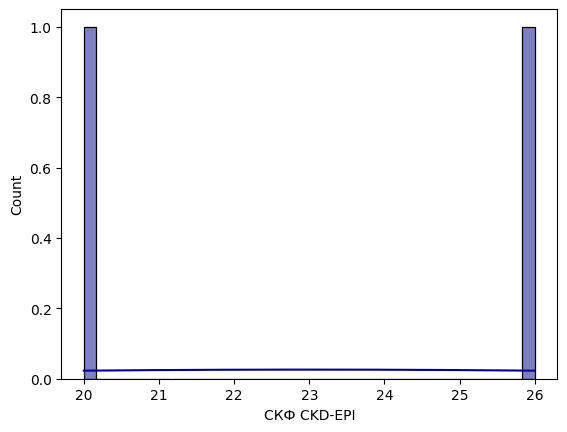

In [517]:
sns.histplot(s_4['СКФ CKD-EPI'], kde=True, bins=int(180/5), color = 'darkblue')

# Множественное сравнение

## Критерий Крускалла-Уолиса по (СКФ CKD-EPI)

In [518]:
s, p = kruskal(s_1['СКФ CKD-EPI'].values,s_2['СКФ CKD-EPI'].values,s_3a['СКФ CKD-EPI'].values,s_3b['СКФ CKD-EPI'].values)
alpha = 0.05
print(f"pvalue: {p : .2f}")
if p < alpha:
    print('Различия статистически значимы.')
else:
    print('Различия статистически не значимы.')

pvalue:  0.00
Различия статистически значимы.


## Критерий Данна по (СКФ CKD-EPI)

In [519]:
dunn = posthoc_dunn([s_1['СКФ CKD-EPI'].values,s_2['СКФ CKD-EPI'].values,s_3a['СКФ CKD-EPI'].values,s_3b['СКФ CKD-EPI'].values], p_adjust = 'bonferroni').round(3)

In [520]:
dunn = dunn.rename(columns={1:'1 стадия',2:'2 стадия',3:'3а стадия',4:'3б стадия'},index = {1:'1 стадия',2:'2 стадия',3:'3а стадия',4:'3б стадия'})
dunn

,1 стадия,2 стадия,3а стадия,3б стадия
1 стадия,1.000,0.011,0.000,0.000
2 стадия,0.011,1.000,0.004,0.000
3а стадия,0.000,0.004,1.000,0.024
3б стадия,0.000,0.000,0.024,1.000


In [521]:
ans_dunn = dunn.copy()
ans_dunn[ans_dunn < 0.05] = 'Значимы'
ans_dunn

,1 стадия,2 стадия,3а стадия,3б стадия
1 стадия,1.0,Значимы,Значимы,Значимы
2 стадия,Значимы,1.0,Значимы,Значимы
3а стадия,Значимы,Значимы,1.0,Значимы
3б стадия,Значимы,Значимы,Значимы,1.0


## Критерий Данна по всем числовым показателям

**Данна по Возрасту**

In [522]:
def dunn(s_1,s_2,s_3a,s_3b,col):
  dunn_ = posthoc_dunn([s_1[col].values,
                         s_2[col].values,
                         s_3a[col].values,
                         s_3b[col].values],
                         p_adjust = 'bonferroni').round(3).rename(columns={1:'1 стадия',
                                                                           2:'2 стадия',
                                                                           3:'3а стадия',
                                                                           4:'3б стадия'},index = {1:'1 стадия',
                                                                                                   2:'2 стадия',
                                                                                                   3:'3а стадия',
                                                                                                   4:'3б стадия'})

  ans_dunn_ = dunn_.copy()
  ans_dunn_[ans_dunn_ < 0.05] = 'Значимы'
  ans_dunn_
  return dunn_, ans_dunn_

In [523]:
dunn_age, ans_dunn_age = (dunn(s_1,s_2,s_3a,s_3b,'возраст'))
dunn_age

,1 стадия,2 стадия,3а стадия,3б стадия
1 стадия,1.000,0.358,0.000,0.006
2 стадия,0.358,1.000,0.054,0.743
3а стадия,0.000,0.054,1.000,1.000
3б стадия,0.006,0.743,1.000,1.000


In [524]:
ans_dunn_age

,1 стадия,2 стадия,3а стадия,3б стадия
1 стадия,1.0,0.358,Значимы,Значимы
2 стадия,0.358,1.000,0.054,0.743
3а стадия,Значимы,0.054,1.0,1.0
3б стадия,Значимы,0.743,1.0,1.0


**Данна по ИМТ**

In [525]:
dunn_imt, ans_dunn_imt = (dunn(s_1,s_2,s_3a,s_3b,'ИМТ'))
dunn_imt

,1 стадия,2 стадия,3а стадия,3б стадия
1 стадия,1.0,1.0,1.0,1.0
2 стадия,1.0,1.0,1.0,1.0
3а стадия,1.0,1.0,1.0,1.0
3б стадия,1.0,1.0,1.0,1.0


In [526]:
ans_dunn_imt

,1 стадия,2 стадия,3а стадия,3б стадия
1 стадия,1.0,1.0,1.0,1.0
2 стадия,1.0,1.0,1.0,1.0
3а стадия,1.0,1.0,1.0,1.0
3б стадия,1.0,1.0,1.0,1.0


**Данна стаж**

In [527]:
dunn_exp, ans_dunn_exp = (dunn(s_1,s_2,s_3a,s_3b,'стаж болезни'))
dunn_exp

,1 стадия,2 стадия,3а стадия,3б стадия
1 стадия,1.000,0.870,0.017,0.1
2 стадия,0.870,1.000,0.664,1.0
3а стадия,0.017,0.664,1.000,1.0
3б стадия,0.100,1.000,1.000,1.0


In [528]:
ans_dunn_exp

,1 стадия,2 стадия,3а стадия,3б стадия
1 стадия,1.0,0.870,Значимы,0.1
2 стадия,0.87,1.000,0.664,1.0
3а стадия,Значимы,0.664,1.0,1.0
3б стадия,0.1,1.000,1.0,1.0


**Данна по креатинину**

In [529]:
dunn_cr, ans_dunn_cr = (dunn(s_1,s_2,s_3a,s_3b,'Креатинин, мкмоль/л'))
dunn_cr

,1 стадия,2 стадия,3а стадия,3б стадия
1 стадия,1.000,0.055,0.000,0.000
2 стадия,0.055,1.000,0.006,0.000
3а стадия,0.000,0.006,1.000,0.039
3б стадия,0.000,0.000,0.039,1.000


In [530]:
ans_dunn_cr

,1 стадия,2 стадия,3а стадия,3б стадия
1 стадия,1.0,0.055,Значимы,Значимы
2 стадия,0.055,1.0,Значимы,Значимы
3а стадия,Значимы,Значимы,1.0,Значимы
3б стадия,Значимы,Значимы,Значимы,1.0


**Данна по глюкозе**

In [531]:
dunn_gl, ans_dunn_gl = (dunn(s_1,s_2,s_3a,s_3b,'Глюкоза, ммоль/л'))
dunn_gl

,1 стадия,2 стадия,3а стадия,3б стадия
1 стадия,1.0,1.0,1.0,1.0
2 стадия,1.0,1.0,1.0,1.0
3а стадия,1.0,1.0,1.0,1.0
3б стадия,1.0,1.0,1.0,1.0


In [532]:
ans_dunn_gl

,1 стадия,2 стадия,3а стадия,3б стадия
1 стадия,1.0,1.0,1.0,1.0
2 стадия,1.0,1.0,1.0,1.0
3а стадия,1.0,1.0,1.0,1.0
3б стадия,1.0,1.0,1.0,1.0


**Данна по железу**

In [533]:
dunn_soe, ans_dunn_soe = (dunn(s_1,s_2,s_3a,s_3b,'СОЭ (мм/ч)'))
dunn_soe

,1 стадия,2 стадия,3а стадия,3б стадия
1 стадия,1.000,1.0,0.212,1.0
2 стадия,1.000,1.0,1.000,1.0
3а стадия,0.212,1.0,1.000,1.0
3б стадия,1.000,1.0,1.000,1.0


In [534]:
ans_dunn_soe

,1 стадия,2 стадия,3а стадия,3б стадия
1 стадия,1.000,1.0,0.212,1.0
2 стадия,1.000,1.0,1.000,1.0
3а стадия,0.212,1.0,1.000,1.0
3б стадия,1.000,1.0,1.000,1.0


**Данна по эритроцитам**

In [535]:
dunn_er, ans_dunn_er = (dunn(s_1,s_2,s_3a,s_3b,'Эритроциты (РВС), 10^12/л'))
dunn_er

,1 стадия,2 стадия,3а стадия,3б стадия
1 стадия,1.0,1.000,1.000,1.000
2 стадия,1.0,1.000,0.623,0.708
3а стадия,1.0,0.623,1.000,1.000
3б стадия,1.0,0.708,1.000,1.000


In [536]:
ans_dunn_er

,1 стадия,2 стадия,3а стадия,3б стадия
1 стадия,1.0,1.000,1.000,1.000
2 стадия,1.0,1.000,0.623,0.708
3а стадия,1.0,0.623,1.000,1.000
3б стадия,1.0,0.708,1.000,1.000


**Данна по гемоглобину**

In [537]:
dunn_gemo, ans_dunn_gemo = (dunn(s_1,s_2,s_3a,s_3b,'Гемоглобин (HGB), гр/л'))
dunn_gemo

,1 стадия,2 стадия,3а стадия,3б стадия
1 стадия,1.0,1.000,1.000,1.0
2 стадия,1.0,1.000,0.169,1.0
3а стадия,1.0,0.169,1.000,1.0
3б стадия,1.0,1.000,1.000,1.0


In [538]:
ans_dunn_gemo

,1 стадия,2 стадия,3а стадия,3б стадия
1 стадия,1.0,1.000,1.000,1.0
2 стадия,1.0,1.000,0.169,1.0
3а стадия,1.0,0.169,1.000,1.0
3б стадия,1.0,1.000,1.000,1.0


**Данна по гематокриту**

In [539]:
dunn_gema, ans_dunn_gema = (dunn(s_1,s_2,s_3a,s_3b,'Гематокрит (HCT), %'))
dunn_gema

,1 стадия,2 стадия,3а стадия,3б стадия
1 стадия,1.0,1.000,1.000,1.0
2 стадия,1.0,1.000,0.207,1.0
3а стадия,1.0,0.207,1.000,1.0
3б стадия,1.0,1.000,1.000,1.0


In [540]:
ans_dunn_gema

,1 стадия,2 стадия,3а стадия,3б стадия
1 стадия,1.0,1.000,1.000,1.0
2 стадия,1.0,1.000,0.207,1.0
3а стадия,1.0,0.207,1.000,1.0
3б стадия,1.0,1.000,1.000,1.0


**Данна по Среднему объему эритроцитов (MCV)**

In [541]:
dunn_mcv, ans_dunn_mcv = (dunn(s_1,s_2,s_3a,s_3b,'Ср. объем эритроцитов (MCV), фл'))
dunn_mcv

,1 стадия,2 стадия,3а стадия,3б стадия
1 стадия,1.0,1.0,1.0,1.0
2 стадия,1.0,1.0,1.0,1.0
3а стадия,1.0,1.0,1.0,1.0
3б стадия,1.0,1.0,1.0,1.0


In [542]:
ans_dunn_mcv

,1 стадия,2 стадия,3а стадия,3б стадия
1 стадия,1.0,1.0,1.0,1.0
2 стадия,1.0,1.0,1.0,1.0
3а стадия,1.0,1.0,1.0,1.0
3б стадия,1.0,1.0,1.0,1.0


**Данна по Ср. содержание HGB в RBC (MCH), пг**

In [543]:
dunn_mch, ans_dunn_mch = (dunn(s_1,s_2,s_3a,s_3b,'Ср. содержание HGB в RBC (MCH), пг'))
dunn_mch

,1 стадия,2 стадия,3а стадия,3б стадия
1 стадия,1.0,1.0,1.0,1.0
2 стадия,1.0,1.0,1.0,1.0
3а стадия,1.0,1.0,1.0,1.0
3б стадия,1.0,1.0,1.0,1.0


In [544]:
ans_dunn_mch

,1 стадия,2 стадия,3а стадия,3б стадия
1 стадия,1.0,1.0,1.0,1.0
2 стадия,1.0,1.0,1.0,1.0
3а стадия,1.0,1.0,1.0,1.0
3б стадия,1.0,1.0,1.0,1.0


**Данна по тромбоцитам**

In [545]:
dunn_tr, ans_dunn_tr = (dunn(s_1,s_2,s_3a,s_3b,'Тромбоциты (PLT), 10^9/л'))
dunn_tr

,1 стадия,2 стадия,3а стадия,3б стадия
1 стадия,1.0,1.0,1.0,1.0
2 стадия,1.0,1.0,1.0,1.0
3а стадия,1.0,1.0,1.0,1.0
3б стадия,1.0,1.0,1.0,1.0


In [546]:
ans_dunn_tr

,1 стадия,2 стадия,3а стадия,3б стадия
1 стадия,1.0,1.0,1.0,1.0
2 стадия,1.0,1.0,1.0,1.0
3а стадия,1.0,1.0,1.0,1.0
3б стадия,1.0,1.0,1.0,1.0


**Данна по Ширине распределения RBC (RDV-CV), %**

In [547]:
dunn_rbc, ans_dunn_rbc = (dunn(s_1,s_2,s_3a,s_3b,'Ширина распределения RBC (RDV-CV), %'))
dunn_rbc

,1 стадия,2 стадия,3а стадия,3б стадия
1 стадия,1.0,1.0,1.0,1.0
2 стадия,1.0,1.0,1.0,1.0
3а стадия,1.0,1.0,1.0,1.0
3б стадия,1.0,1.0,1.0,1.0


In [548]:
ans_dunn_rbc

,1 стадия,2 стадия,3а стадия,3б стадия
1 стадия,1.0,1.0,1.0,1.0
2 стадия,1.0,1.0,1.0,1.0
3а стадия,1.0,1.0,1.0,1.0
3б стадия,1.0,1.0,1.0,1.0


**Данна по лейкоцитам**

In [549]:
dunn_l, ans_dunn_l = (dunn(s_1,s_2,s_3a,s_3b,'лейкоциты'))
dunn_l

,1 стадия,2 стадия,3а стадия,3б стадия
1 стадия,1.0,1.0,1.0,1.0
2 стадия,1.0,1.0,1.0,1.0
3а стадия,1.0,1.0,1.0,1.0
3б стадия,1.0,1.0,1.0,1.0


In [550]:
ans_dunn_l

,1 стадия,2 стадия,3а стадия,3б стадия
1 стадия,1.0,1.0,1.0,1.0
2 стадия,1.0,1.0,1.0,1.0
3а стадия,1.0,1.0,1.0,1.0
3б стадия,1.0,1.0,1.0,1.0
